<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Q2. Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 of the project: what are the costs/benefits of renovateable features such as quality, condition, and renovations?

To isolate the effect of the renovateable features on the sale price one way of doing this is to use the residuals from the first model as your target variable in the second model. The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. You will use the renovateable features as the predictors for this second model.  

 
---

### **Your goals for question two:**

Use the features in the data that are renovatable as predictors for your second model. This second model will predict the variance/residuals from the first model.  As with Q1 , train the model on pre-2010 data and evaluate its performance on the 2010 houses.

How well has your chosen model done?  


Which renovateable features are the most important in your second model .  Articulate your findings and make sense of the results.

 
Do you trust your model?   


## NOTEBOOK OVERVIEW

#### > used Lasso model from question 1 to generate target variable 
#### > read in dummied upgradable predictors from EDA
#### > ran Lasso, Ridge, SVC and SGD with CV wrappers.
#### > cross validation on Lasso, Ridge, SGD are scored 15% 
#### > scored test on these 3 models are around 22%
#### > visualised the coeffients of 3 models and identified the feature importance
#### > conclusion in the end

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### get target variables
    - use Lasso from question 1 as model for prediction
    - residual: y_test - predictions

In [2]:
X_train = pd.read_csv('./processed data/X_train_fixed.csv',index_col=0)
X_test = pd.read_csv('./processed data/X_test_fixed.csv',index_col=0)
y_train = pd.read_csv('./processed data/y_train.csv',index_col=0)
y_train = y_train.SalePrice
y_test = pd.read_csv('./processed data/y_test.csv',index_col=0)
y_test = y_test.SalePrice

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [3]:
from sklearn.linear_model import Lasso, LassoCV

# 10 folds
lasso_cv_10 = LassoCV(n_alphas = 250, cv = 10).fit(Xs_train, y_train)

lasso = Lasso(alpha=lasso_cv_10.alpha_).fit(Xs_train, y_train)

In [4]:
test_preds = lasso.predict(Xs_test)
test_residuals = y_test - test_preds

train_preds = lasso.predict(Xs_train)
train_residuals = y_train - train_preds

In [5]:
y_train = train_residuals
y_test = test_residuals

### introduce renovateable features
#### no need for standardization as all features are dummied.

In [6]:
X_train = pd.read_csv('./processed data/X_train_reno.csv', index_col=0)
X_test = pd.read_csv('./processed data/X_test_reno.csv', index_col=0)

In [7]:
X_train

,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,...,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unknown
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1453,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1454,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1455,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [8]:
from numpy import count_nonzero
def check_sparsity(X):
    sparsity = 1.0 - ( count_nonzero(X) / float(X.size) )
    print('Sparsity check:',sparsity)

check_sparsity(X_train), check_sparsity(X_test)

Sparsity check: 0.7946191360046584
Sparsity check: 0.7928610059491616


(None, None)

### try Lasso

In [9]:
lasso_cv_10 = LassoCV(n_alphas = 500, cv = 10).fit(X_train, y_train)
lasso = Lasso(alpha=lasso_cv_10.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv = 5)
lasso_scores.mean(), lasso_scores.std()

(0.15640552865182183, 0.06398613099788786)

In [10]:
lasso_cv_10.alpha_

57.147247501175215

In [11]:
lasso_cv_10.score(X_test, y_test)

0.23032562751904895

In [12]:
# 5 folds
lasso_cv_5 = LassoCV(n_alphas = 500, cv = 5).fit(X_train, y_train)
lasso = Lasso(alpha=lasso_cv_5.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv = 5)
lasso_scores.mean(), lasso_scores.std()

(0.15748395873988585, 0.06464238992697305)

In [13]:
lasso_cv_5.alpha_

78.57273499678868

In [14]:
lasso_cv_5.score(X_test, y_test)

0.2254419082480127

In [15]:
lasso_cv_10.coef_
lasso_features = pd.DataFrame({'feature': X_train.columns,
                              'lasso_coef': lasso_cv_10.coef_,
                              'lasso_abs_coef': abs(lasso_cv_10.coef_)})

lasso_features.sort_values(by = 'lasso_abs_coef', ascending=False, inplace=True)
lasso_features[:20]

,feature,lasso_coef,lasso_abs_coef
7,OverallQual_9,40417.639067,40417.639067
8,OverallQual_10,29589.152124,29589.152124
16,OverallCond_9,23303.665524,23303.665524
14,OverallCond_7,15504.435511,15504.435511
15,OverallCond_8,13348.846347,13348.846347
61,Functional_Typ,12933.638202,12933.638202
10,OverallCond_3,-12602.941254,12602.941254
6,OverallQual_8,9027.081532,9027.081532
13,OverallCond_6,7749.721836,7749.721836
71,GarageQual_Gd,6959.561092,6959.561092


### try Ridge

In [16]:
from sklearn.linear_model import Ridge, RidgeCV

r_alphas = np.logspace(0,5,100)

ridge_cv_10 = RidgeCV(alphas = r_alphas, cv = 10).fit(X_train, y_train)
ridge = Ridge(alpha=ridge_cv_10.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 5)
ridge_scores.mean(), ridge_scores.std()

(0.1492037375507226, 0.057334469781581854)

In [17]:
ridge_cv_10.score(X_test, y_test)

0.22539105970221074

In [18]:
ridge_cv_5 = RidgeCV(alphas = r_alphas, cv = 5).fit(X_train, y_train)
ridge = Ridge(alpha=ridge_cv_5.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 5)
ridge_scores.mean(), ridge_scores.std()

(0.1496979241746163, 0.05802109816397672)

In [19]:
ridge_cv_5.score(X_test, y_test)

0.22800651355288204

In [20]:
ridge_features = pd.DataFrame({'feature': X_train.columns,
                              'ridge_coef': ridge_cv_10.coef_,
                              'ridge_abs_coef': abs(ridge_cv_10.coef_)})

ridge_features.sort_values(by = 'ridge_abs_coef', ascending=False, inplace=True)
ridge_features[:20]

,feature,ridge_coef,ridge_abs_coef
7,OverallQual_9,22511.655188,22511.655188
16,OverallCond_9,12922.642920,12922.642920
10,OverallCond_3,-12892.466381,12892.466381
8,OverallQual_10,12126.010323,12126.010323
61,Functional_Typ,11917.511690,11917.511690
14,OverallCond_7,9856.171396,9856.171396
3,OverallQual_5,-8792.394323,8792.394323
54,KitchenQual_Gd,-8285.356593,8285.356593
11,OverallCond_4,-8180.516304,8180.516304
55,KitchenQual_TA,-7695.388425,7695.388425


### try SVR with GridSearchCV to find best C and kerel

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_params = {'kernel':('linear', 'rbf'), 'C':[1,10,100]}
svr = SVR(kernel = 'linear')
svr_gs = GridSearchCV(svr, param_grid=svr_params, cv = 10)
svr_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf')})

In [22]:
svr_gs.best_params_

{'C': 100, 'kernel': 'linear'}

In [23]:
svr_gs_scores = cross_val_score(svr_gs, X_train, y_train, cv =5)
svr_gs_scores.mean(), svr_gs_scores.std()

(0.06792033783986344, 0.024981294313329745)

In [24]:
svr_gs.score(X_test, y_test)

0.0734929867080576

### gradient descent regressor with GridSearchCV to get the best loss function, penalty and alpha

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000)
params = {'loss': ['squared_loss', 'huber'],
          'penalty': ['l1','l2'],
         'alpha': np.logspace(-5,1,100)}

sgd_reg_grd = GridSearchCV(estimator=sgd_reg, param_grid = params, cv = 5, n_jobs = -1)
sgd_reg_grd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04,...
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01]),
                         'loss': ['squared_loss', 'huber'],
                         'penalty': ['l1', 'l2']})

In [26]:
sgd_reg_grd.best_params_

{'alpha': 0.35111917342151344, 'loss': 'squared_loss', 'penalty': 'l1'}

In [27]:
# sgd_reg_grd.cv_results_

In [28]:
sgd_scores = cross_val_score(sgd_reg_grd, X_train, y_train, cv = 5)
sgd_scores.mean(), sgd_scores.std()

(0.14425349666789553, 0.05448645336197488)

In [29]:
sgd_reg_grd.score(X_test, y_test)

0.2351801197648229

In [30]:
sgd_features = pd.DataFrame({'feature': X_train.columns,
                              'sgd_coef': sgd_reg_grd.best_estimator_.coef_,
                              'sgd_abs_coef': abs(sgd_reg_grd.best_estimator_.coef_)})

sgd_features.sort_values(by = 'sgd_abs_coef', ascending=False, inplace=True)
sgd_features[:20]

,feature,sgd_coef,sgd_abs_coef
7,OverallQual_9,22603.488214,22603.488214
61,Functional_Typ,13110.810954,13110.810954
10,OverallCond_3,-12496.308989,12496.308989
16,OverallCond_9,11961.385525,11961.385525
14,OverallCond_7,10266.376619,10266.376619
8,OverallQual_10,10249.065505,10249.065505
11,OverallCond_4,-9574.581657,9574.581657
54,KitchenQual_Gd,-9328.192716,9328.192716
3,OverallQual_5,-9023.695412,9023.695412
55,KitchenQual_TA,-8569.729157,8569.729157


## compare features

In [31]:
features_comparison = pd.DataFrame({'feature':X_train.columns,
                                   'lasso_coef':lasso_cv_10.coef_,
                                   'ridge_coef':ridge_cv_10.coef_,
                                   'SVR_coef':svr_gs.best_estimator_.coef_.reshape(86),
                                   'SGD_coef':sgd_reg_grd.best_estimator_.coef_})
features_comparison

,feature,lasso_coef,ridge_coef,SVR_coef,SGD_coef
0,OverallQual_2,0.000000,806.656560,-139.825787,129.515478
1,OverallQual_3,-3004.183630,-7562.486994,-500.000000,-5805.693141
2,OverallQual_4,-888.212129,-6787.645210,-1309.061987,-6960.098014
3,OverallQual_5,-3007.792789,-8792.394323,-1173.135739,-9023.695412
4,OverallQual_6,-0.000000,-6126.326944,-961.118985,-6436.974164
...,...,...,...,...,...
81,PavedDrive_Y,0.000000,321.541536,1210.695140,936.949057
82,Fence_GdWo,-0.000000,-772.607173,-39.723192,-862.537455
83,Fence_MnPrv,164.054727,212.230449,-928.135497,143.762460
84,Fence_MnWw,-0.000000,-2436.437021,67.573693,-1749.417024


In [32]:
features_comparison = features_comparison.sort_values('lasso_coef')
features_comparison['abs_lasso_coef'] = abs(features_comparison.lasso_coef)

<AxesSubplot:ylabel='feature'>

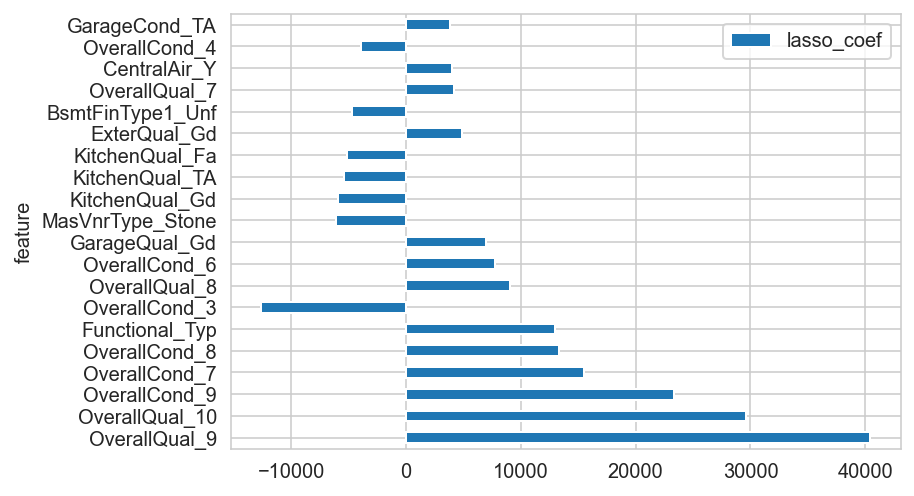

In [33]:
# inspect top feature coefficients by Lasso
features_comparison.sort_values('abs_lasso_coef', ascending=False)[:20].plot(kind = 'barh', x = 'feature', y ='lasso_coef')

<AxesSubplot:xlabel='feature'>

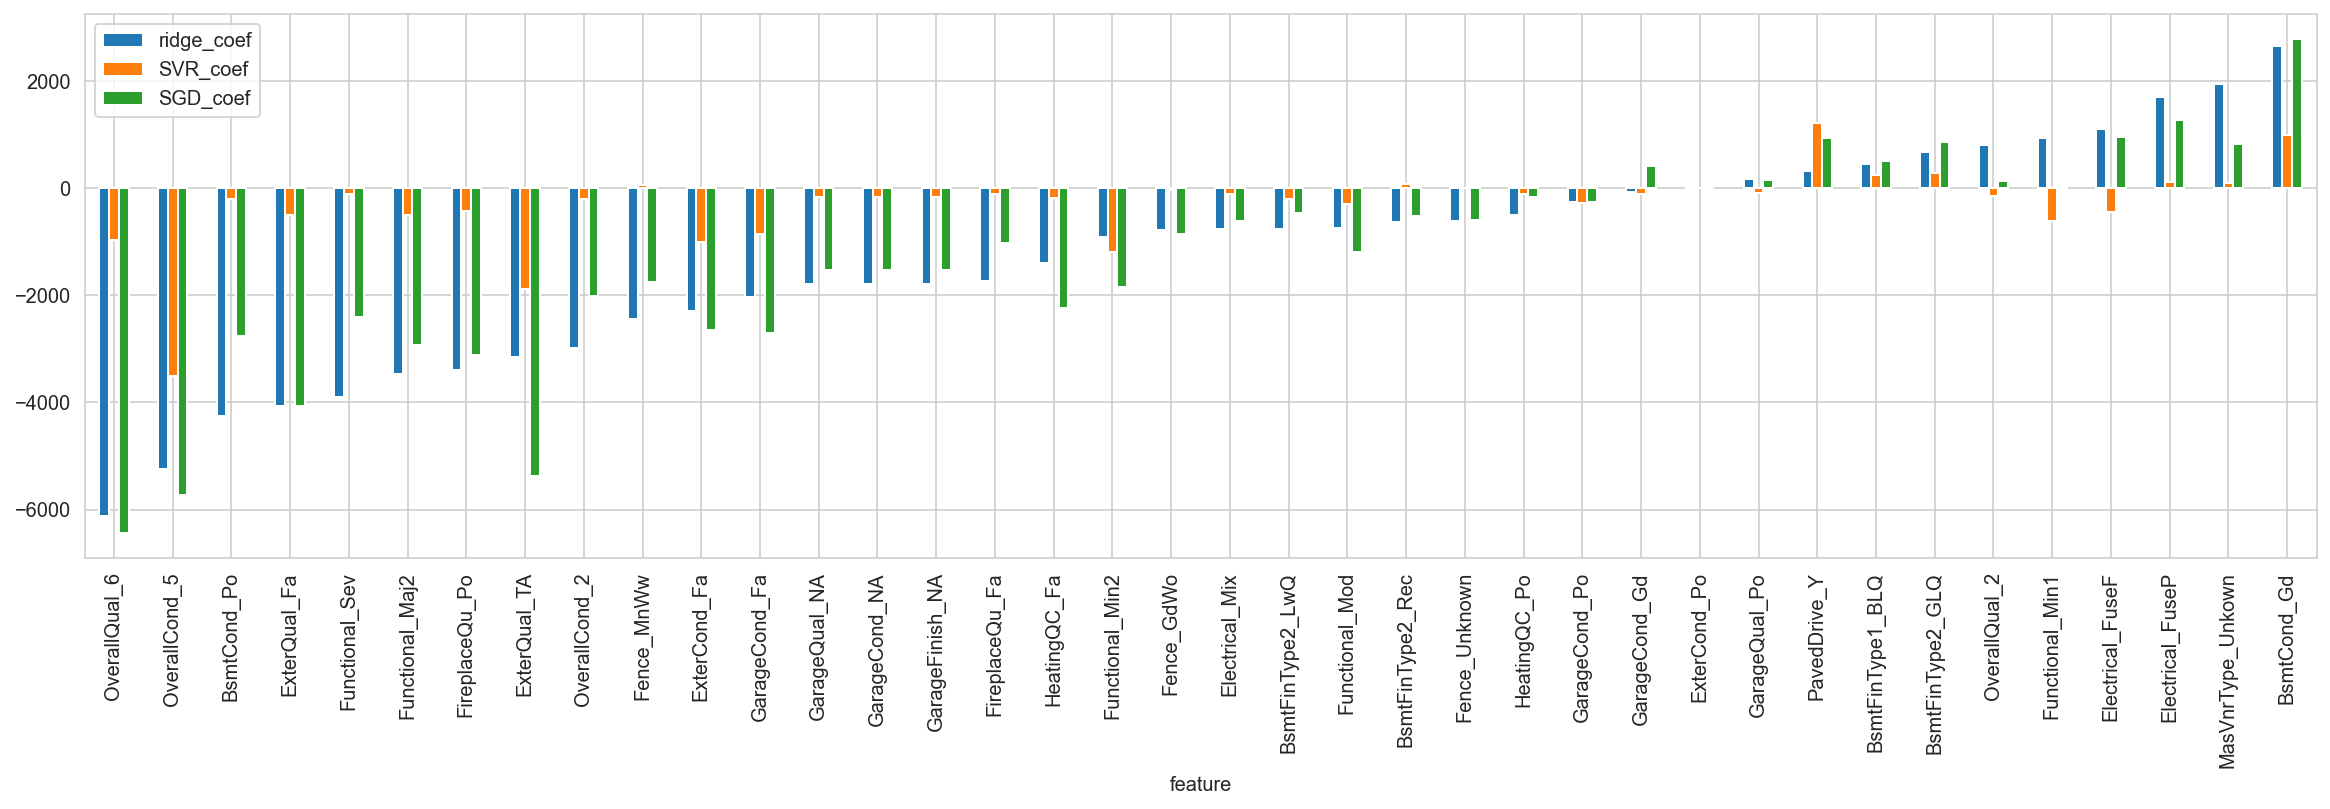

In [34]:
# Lasso muted 38 features out of 86 while other 3 models still rated weights on. 
lasso_mute_features = features_comparison.sort_values(by = 'lasso_coef').loc[features_comparison.lasso_coef == 0]
lasso_mute_features.sort_values('ridge_coef').plot(kind = 'bar', x='feature', y=['ridge_coef','SVR_coef','SGD_coef'], figsize = (20,5))

In [35]:
lasso_mute_features.shape

(38, 6)

In [36]:
neg_features = features_comparison.sort_values(by = 'lasso_coef').loc[features_comparison.lasso_coef < 0]
pos_features = features_comparison.sort_values(by = 'lasso_coef').loc[features_comparison.lasso_coef > 0]

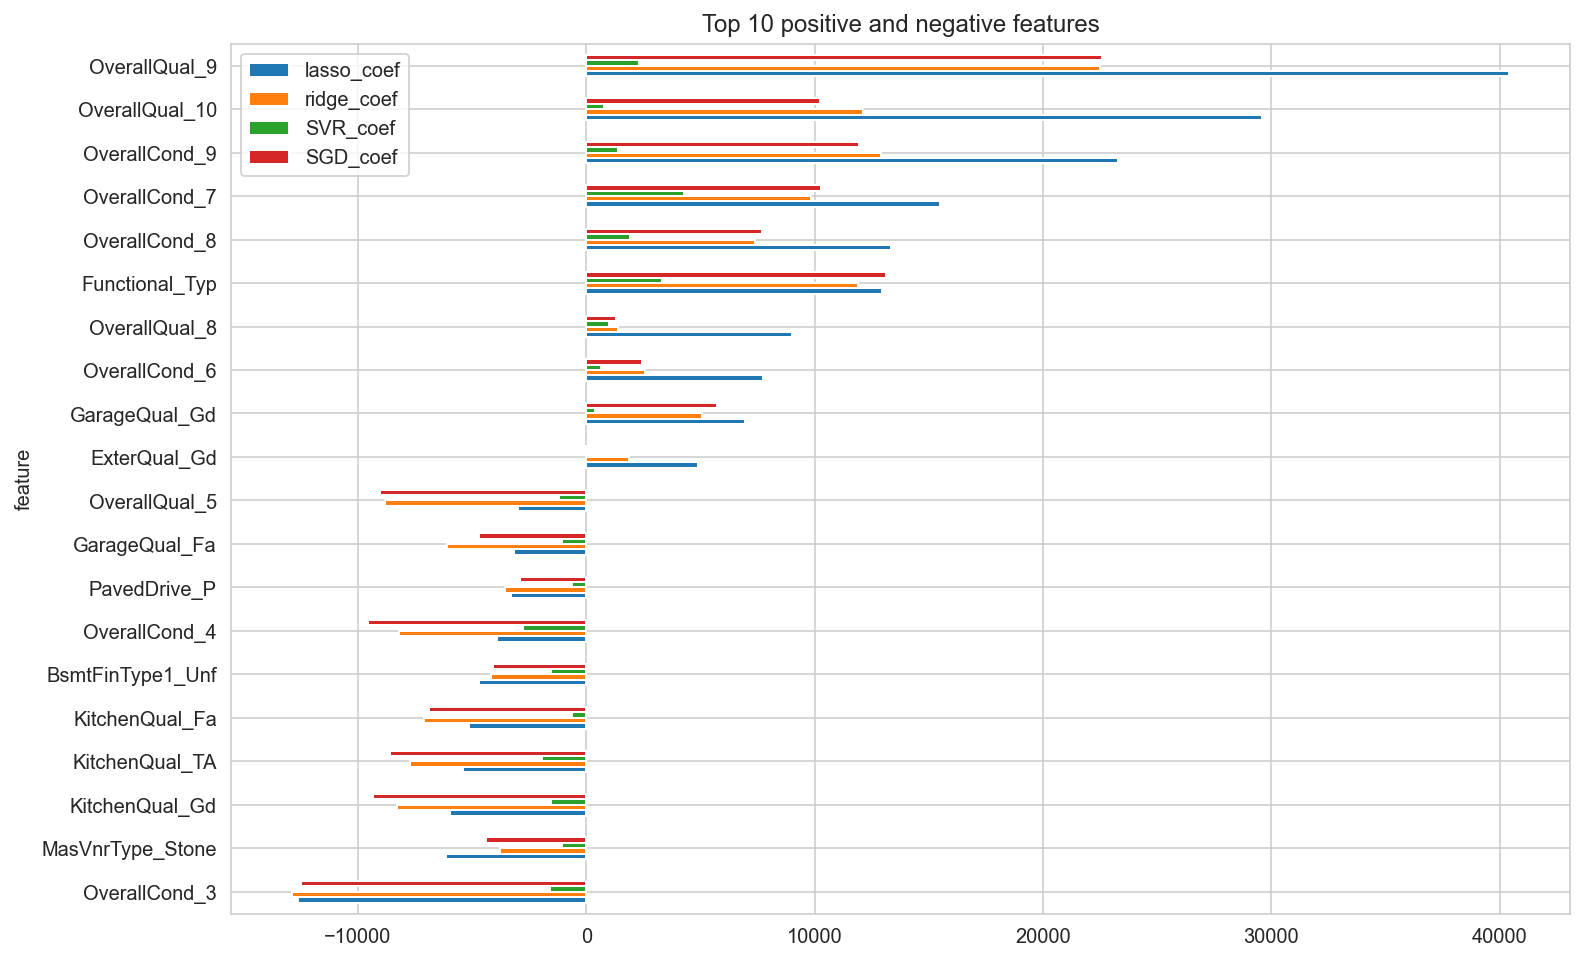

In [37]:
pd.concat([neg_features[:10], pos_features[-10:]]).plot(kind='barh', 
                                                        x = 'feature', 
                                                        y = ['lasso_coef','ridge_coef', 'SVR_coef','SGD_coef'],
                                                        figsize = (12,8))
plt.title('Top 10 positive and negative features');

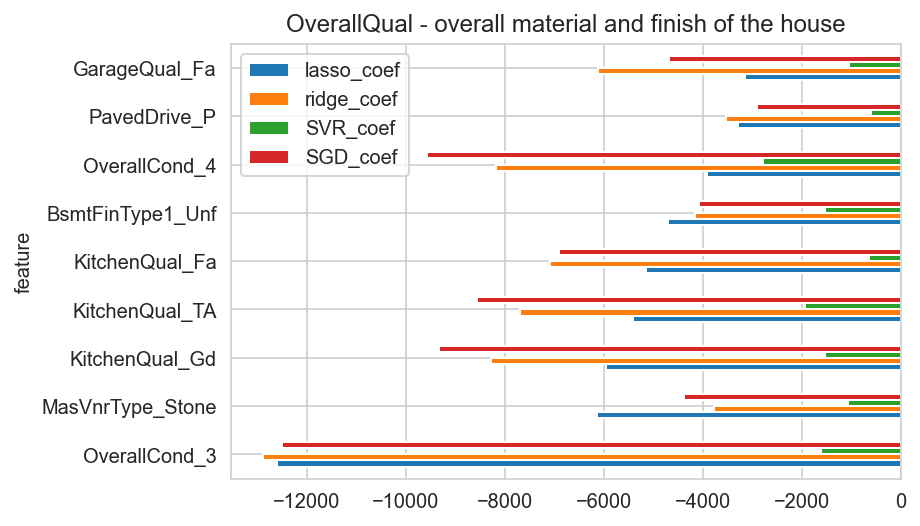

In [38]:
features_comparison[:9].plot(kind = 'barh', x='feature', y=['lasso_coef','ridge_coef','SVR_coef','SGD_coef'])
plt.title('OverallQual - overall material and finish of the house');

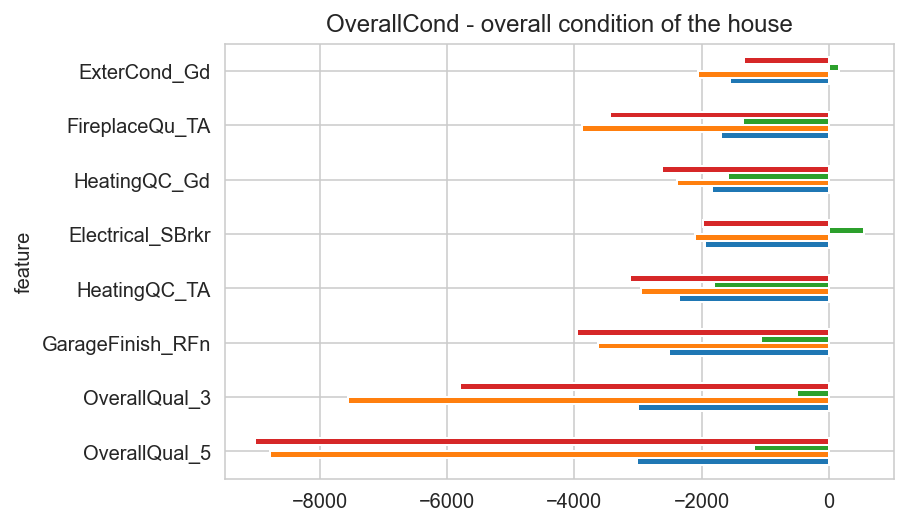

In [39]:
features_comparison[9:17].plot(kind = 'barh', x='feature', y=['lasso_coef','ridge_coef','SVR_coef','SGD_coef'], legend = False)
plt.title('OverallCond - overall condition of the house');

### plot residuals with SGDRegressor

In [40]:
sgd = sgd_reg_grd.best_estimator_
sgd.fit(X_train, y_train)
sgd_preds = sgd.predict(X_test)

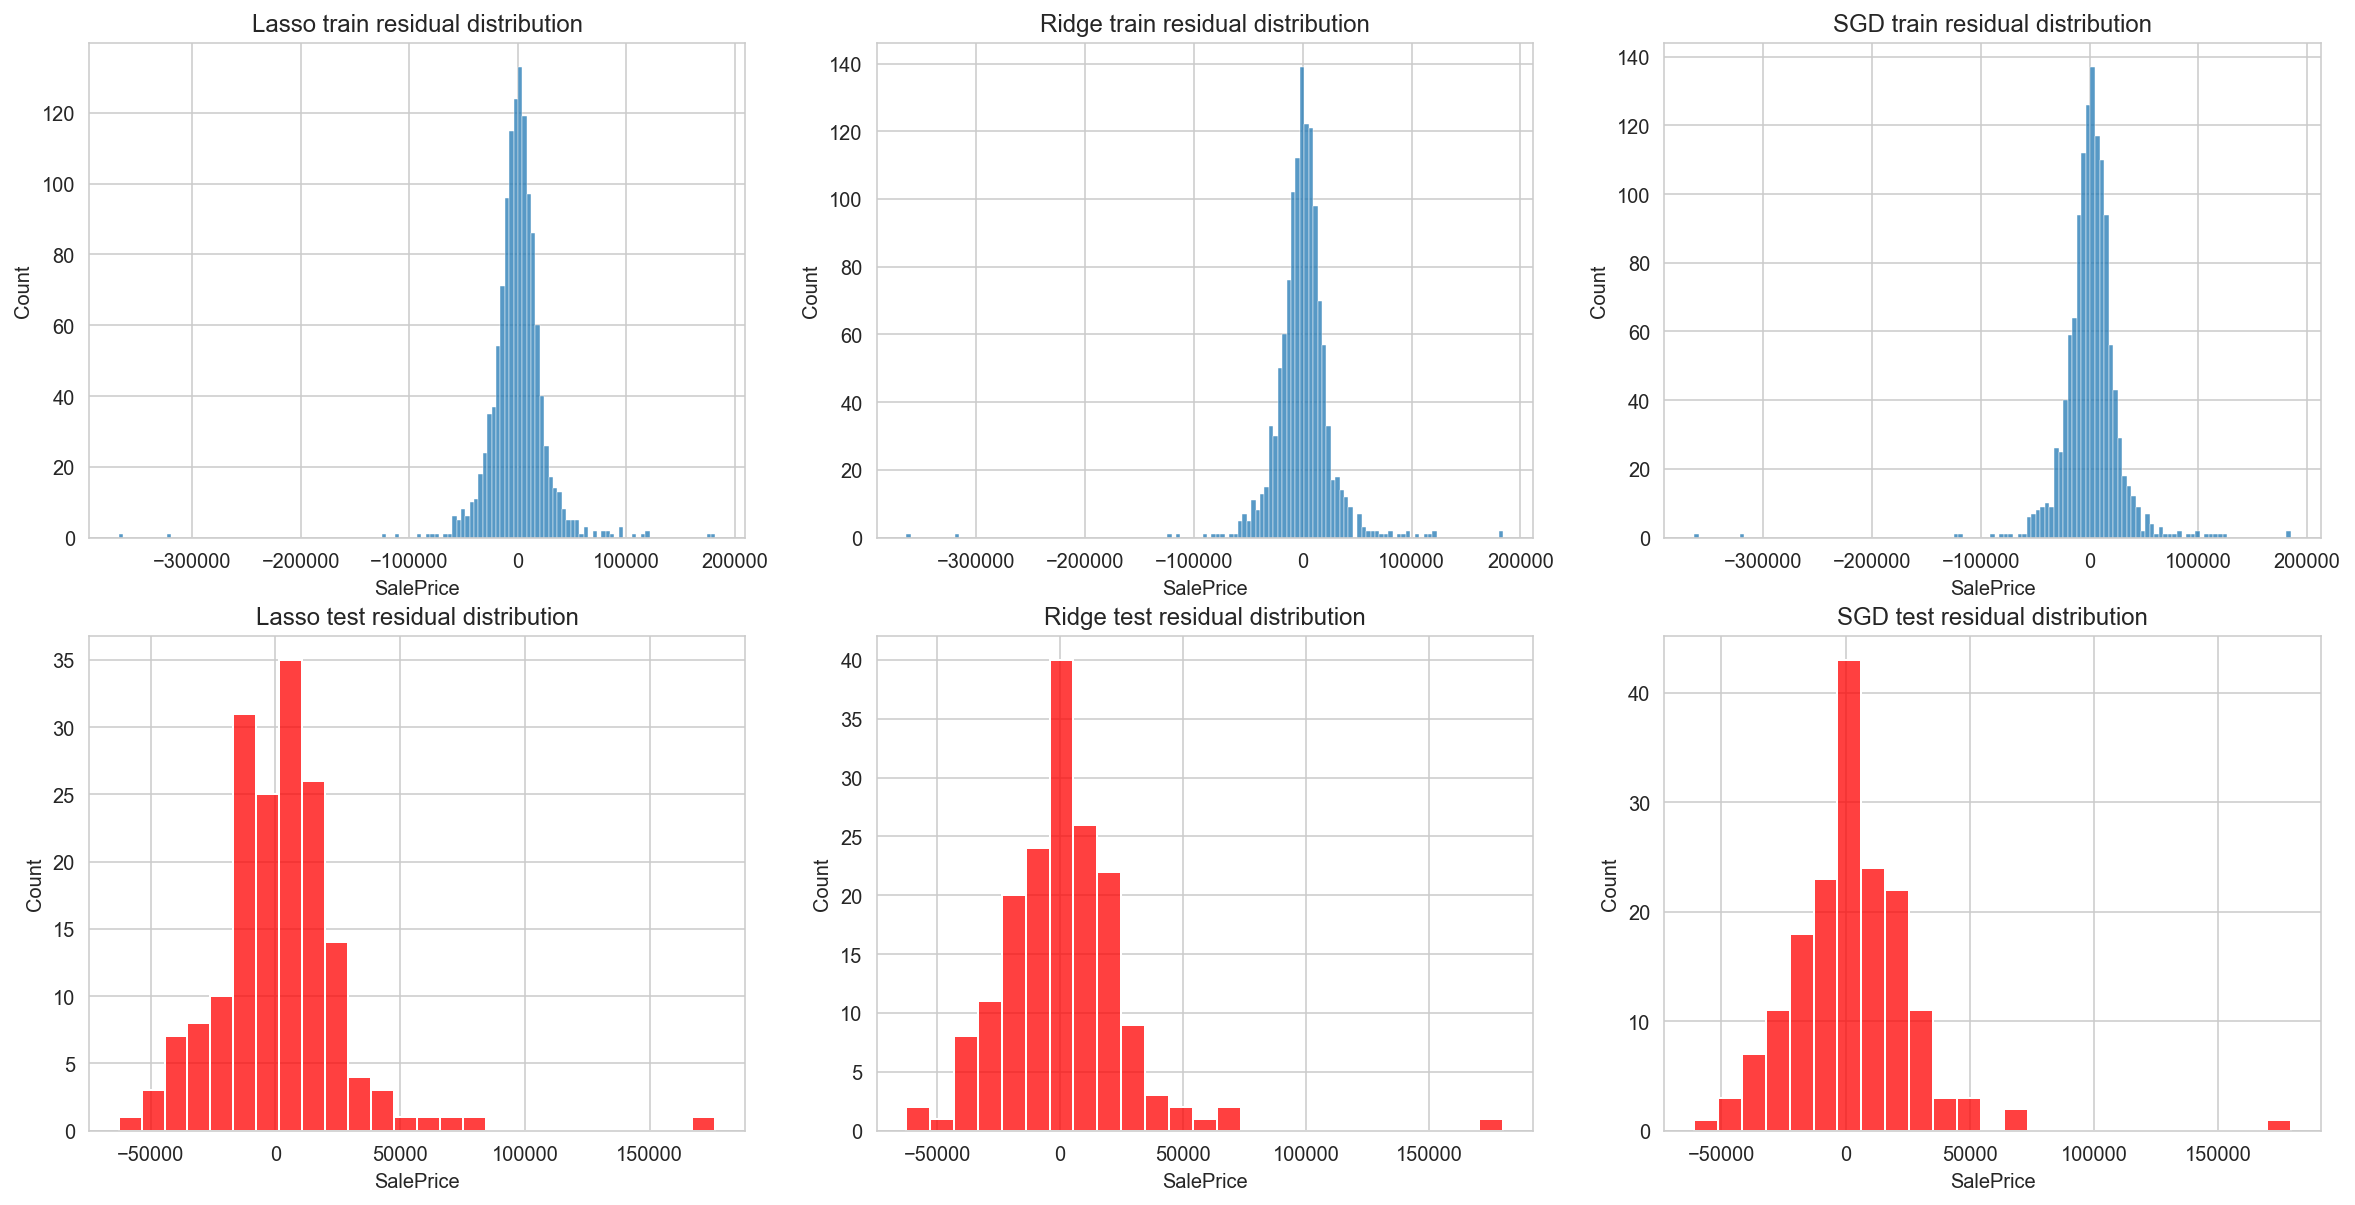

In [41]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))

sns.histplot(ax = axes[0,0], data = y_train - lasso_cv_10.predict(X_train))
sns.histplot(ax = axes[1,0], data = y_test - lasso_cv_10.predict(X_test), color = 'red')
axes[0,0].set_title('Lasso train residual distribution')
axes[1,0].set_title('Lasso test residual distribution')

sns.histplot(ax = axes[0,1], data = y_train - ridge_cv_10.predict(X_train))
sns.histplot(ax = axes[1,1], data = y_test - ridge_cv_10.predict(X_test), color = 'red')
axes[0,1].set_title('Ridge train residual distribution')
axes[1,1].set_title('Ridge test residual distribution')

sns.histplot(ax = axes[0,2], data = y_train - sgd.predict(X_train))
sns.histplot(ax = axes[1,2], data = y_test - sgd.predict(X_test), color = 'red')
axes[0,2].set_title('SGD train residual distribution')
axes[1,2].set_title('SGD test residual distribution');

# residuals are all somewhat normally distributed. 

In [42]:
train_residual_df = pd.DataFrame({'lasso_residual':y_train - lasso_cv_10.predict(X_train),
                                 'ridge_residual':y_train - ridge_cv_10.predict(X_train),
                                 'sgd_residual':y_train - sgd.predict(X_train)})
test_residual_df = pd.DataFrame({'lasso_residual':y_test - lasso_cv_10.predict(X_test),
                                 'ridge_residual':y_test - ridge_cv_10.predict(X_test),
                                 'sgd_residual':y_test - sgd.predict(X_test)})

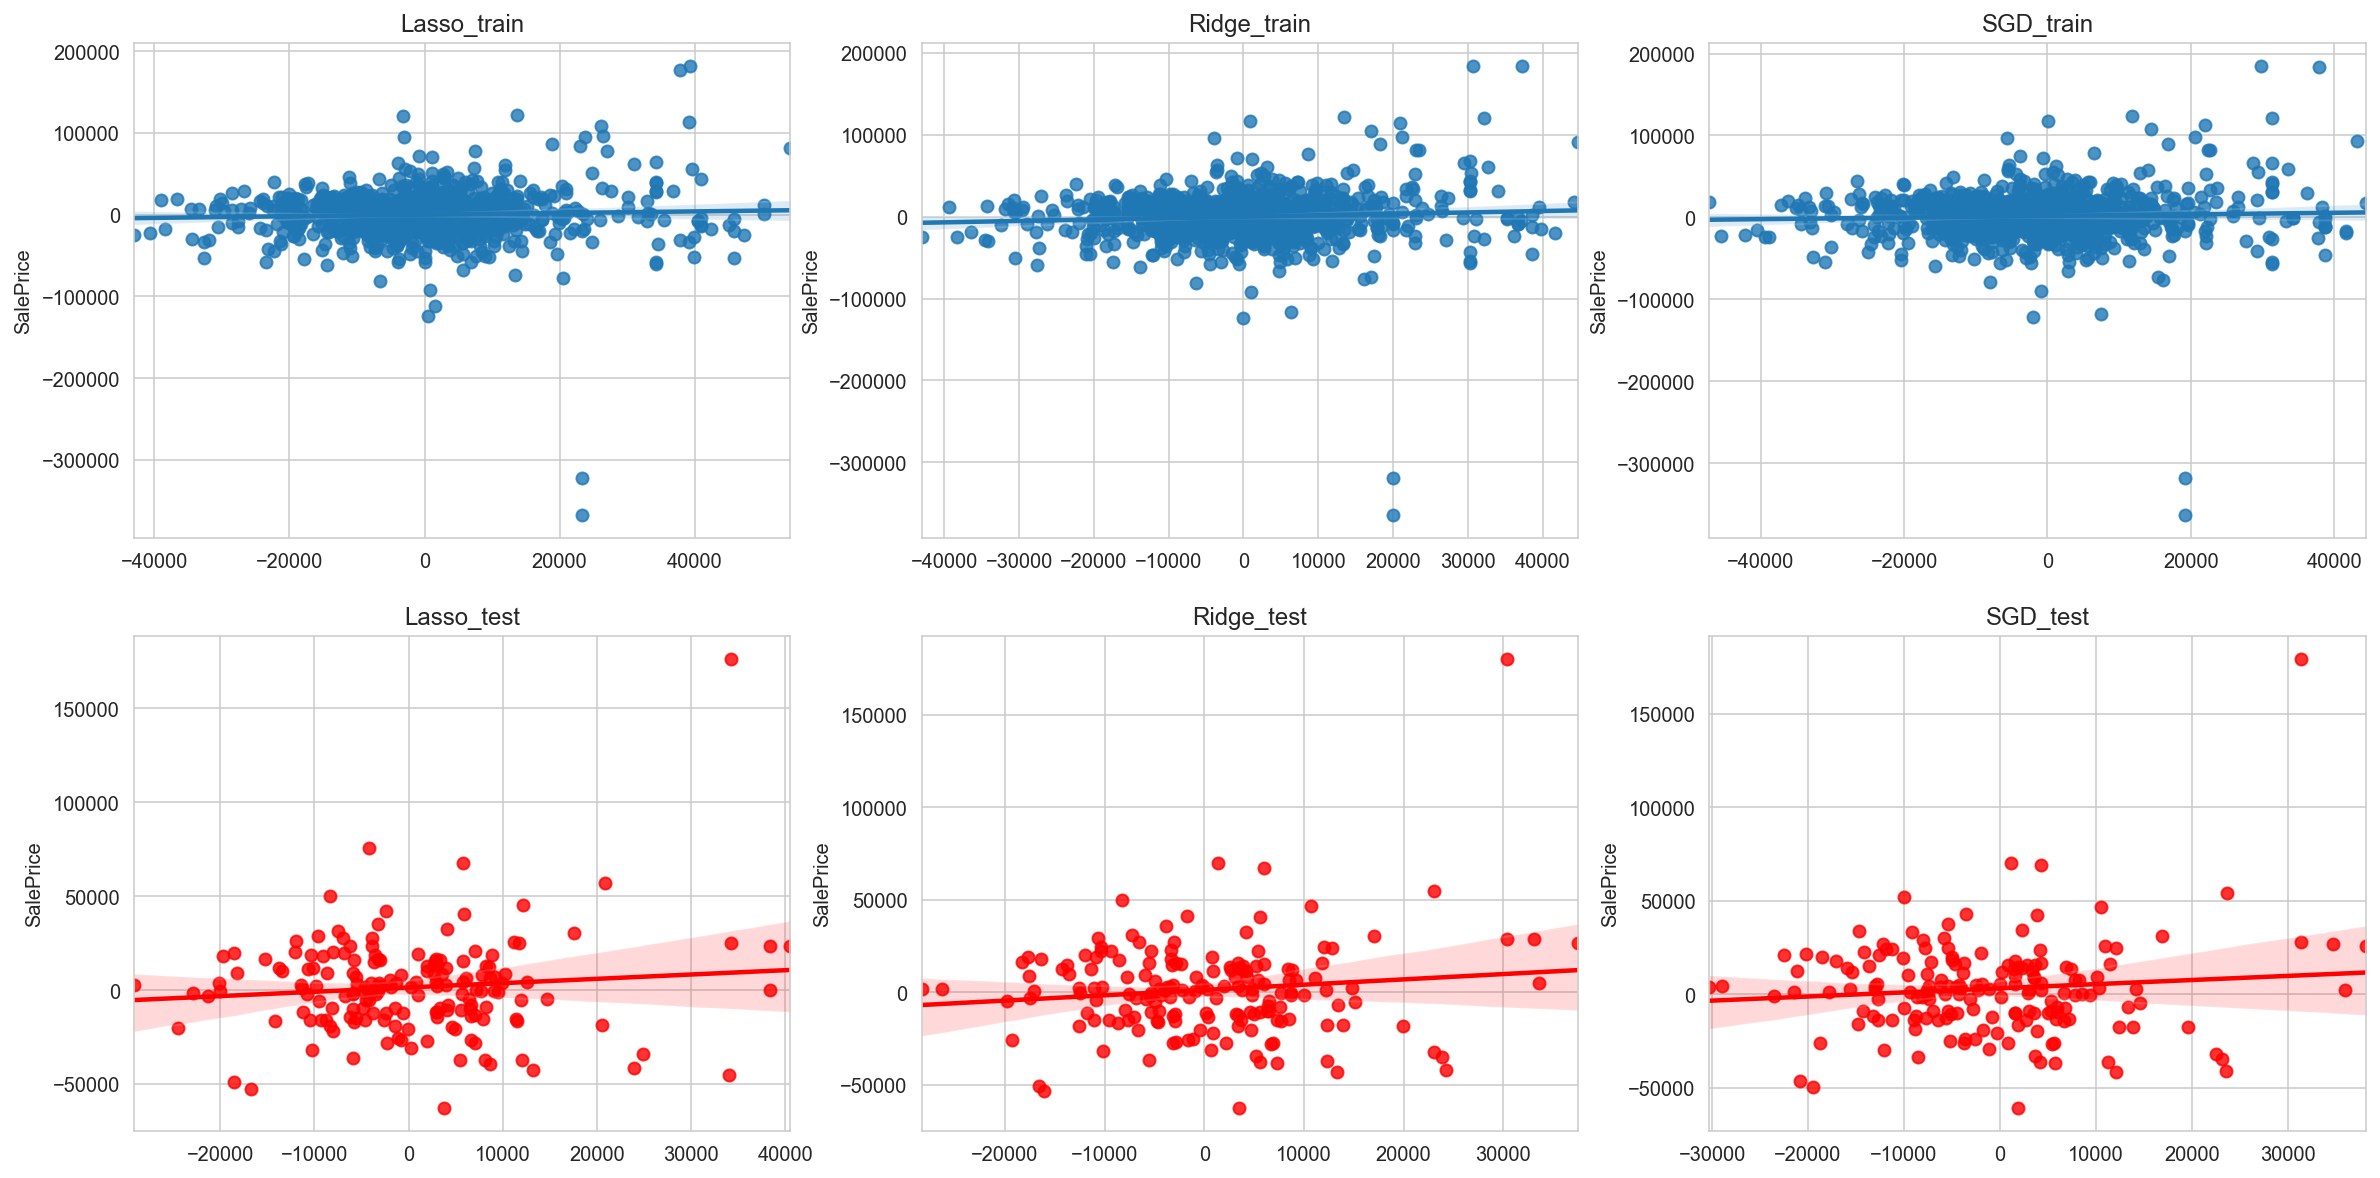

In [43]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))

sns.regplot(ax = axes[0,0], x = lasso_cv_10.predict(X_train), y = y_train - lasso_cv_10.predict(X_train))
sns.regplot(ax = axes[1,0], x = lasso_cv_10.predict(X_test), y = y_test - lasso_cv_10.predict(X_test), color='red')
axes[0,0].set_title('Lasso_train')
axes[1,0].set_title('Lasso_test')

sns.regplot(ax = axes[0,1], x = ridge_cv_10.predict(X_train), y = y_train - ridge_cv_10.predict(X_train))
sns.regplot(ax = axes[1,1], x = ridge_cv_10.predict(X_test), y = y_test - ridge_cv_10.predict(X_test), color='red')
axes[0,1].set_title('Ridge_train')
axes[1,1].set_title('Ridge_test')

sns.regplot(ax = axes[0,2], x = sgd.predict(X_train), y = y_train - sgd.predict(X_train))
sns.regplot(ax = axes[1,2], x = sgd.predict(X_test), y = y_test - sgd.predict(X_test), color='red')
axes[0,2].set_title('SGD_train')
axes[1,2].set_title('SGD_test');

### conclusion
    - Not going to pick a best model for this question as the accuracy is not so great.
    - Maybe there is not much signal in the data?
    - However, I do trust the models cleared out some noises and provided insights on the renovateable features as below:
    >> OverallQual and OverallCond have the biggest impact in explaining the residuals
    >> Quality of kitchen and garage are important.
    